Import Libraries & Dependencies

In [3]:
# All required libraries
import pandas as pd                 # Data manipulation in tabular format
import numpy as np                  # Mathematical and numerical operations
import matplotlib.pyplot as plt     # Data visualization
import seaborn as sns               # Enhanced data visualization

# Machine learning libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Advanced machine learning models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Additional visualization libraries
from matplotlib.colors import LightSource

Loading and Exploring Data

In [5]:
# Defining file paths
data_dict_path = r'C:\Nauka\Koło naukowe\Child Mind Istitute\child-mind-institute-problematic-internet-use\data_dictionary.csv'
train_data_path = r'C:\Nauka\Koło naukowe\Child Mind Istitute\child-mind-institute-problematic-internet-use\train.csv'
test_data_path = r'C:\Nauka\Koło naukowe\Child Mind Istitute\child-mind-institute-problematic-internet-use\test.csv'

# Loading data
data_dict = pd.read_csv(data_dict_path)  # Data dictionary
train_data = pd.read_csv(train_data_path)  # Training dataset
test_data = pd.read_csv(test_data_path)  # Test dataset

# Basic exploration of training data
print("Training dataset information:")
print(train_data.info())  # Display data types, missing values, and number of rows
print("\nPreview of the first 10 rows:")
print(train_data.head(10))  # First 10 rows of the data

# Analysis of categorical variables
print("\nUnique values in categorical variables:")
categorical_columns = train_data.select_dtypes(include=['object']).columns  # Extract categorical variables
for col in categorical_columns:
    print(f"{col}: {train_data[col].unique()}")  # Display unique values

# Checking for missing data
print("\nNumber of missing values in each column:")
print(train_data.isnull().sum())  # Number of missing values in each column

# Exploring the test data
print("\nTest dataset information:")
print(test_data.info())  # Display basic information
print("\nPreview of the first 10 rows:")
print(test_data.head(10))  # First 10 rows of the test dataset

# Displaying the data dictionary
print("\nFirst 10 rows of the data dictionary:")
print(data_dict.head(10))  # Display the first 10 rows of the data dictionary


Training dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference  

Missing Data Analysis

In [7]:
# Calculating the number of missing values and their percentage in the dataset
missing_sii_count = train_data['sii'].isnull().sum()  # Number of missing values
missing_sii_percentage = (missing_sii_count / len(train_data)) * 100  # Percentage of missing values
print(f"Number of missing values in 'sii': {missing_sii_count} ({missing_sii_percentage:.2f}%)")

# Adding a binary variable indicating missing values in 'sii'
train_data['sii_missing'] = train_data['sii'].isnull().astype(int)

# Extracting numerical variables for correlation analysis
numeric_columns = train_data.select_dtypes(include=['number'])

# Calculating correlations
missing_corr = numeric_columns.corr()['sii_missing'].sort_values(ascending=False)
print("\nCorrelations of missing values in 'sii':")
print(missing_corr)


Number of missing values in 'sii': 1224 (30.91%)

Correlations of missing values in 'sii':
sii_missing                     1.000000
Physical-Waist_Circumference    0.126656
FGC-FGC_TL                      0.097035
Physical-BMI                    0.091145
BIA-BIA_BMI                     0.085185
                                  ...   
PCIAT-PCIAT_18                       NaN
PCIAT-PCIAT_19                       NaN
PCIAT-PCIAT_20                       NaN
PCIAT-PCIAT_Total                    NaN
sii                                  NaN
Name: sii_missing, Length: 71, dtype: float64


Visualization of correlations of missing values in 'sii'

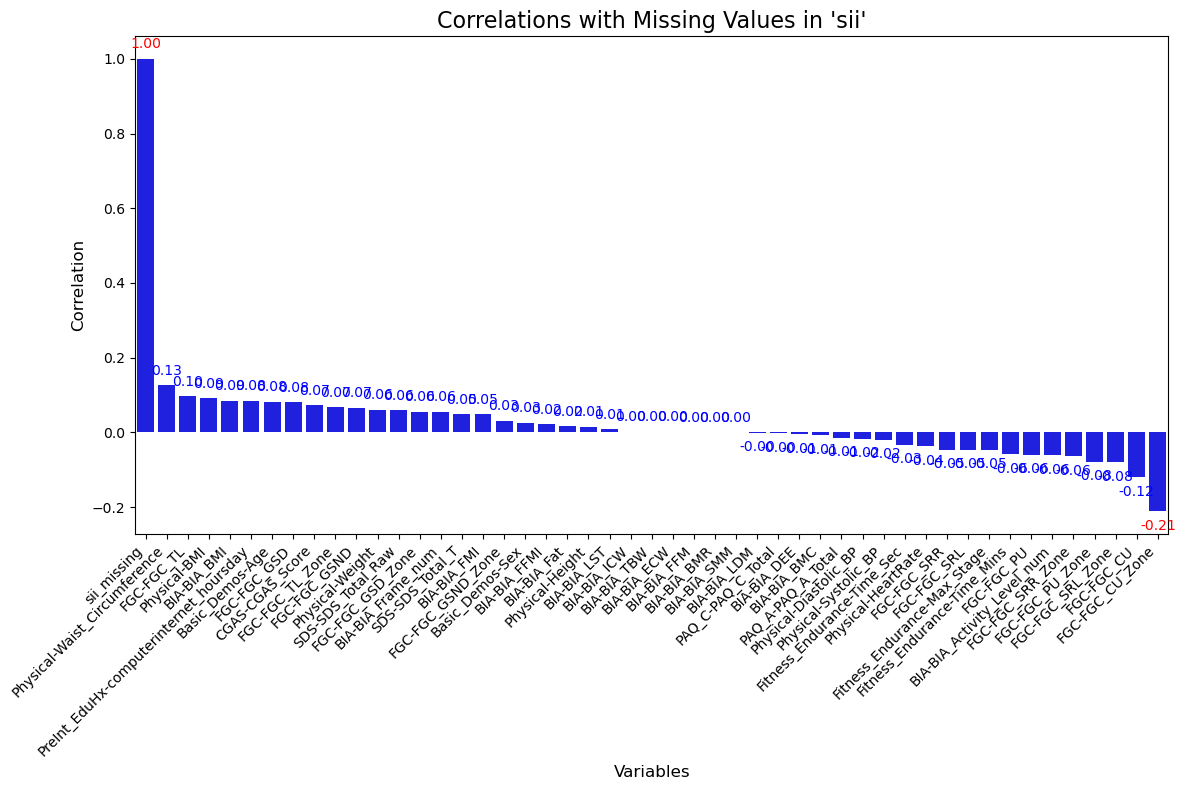

In [9]:
# Handling missing values in correlations
missing_corr_cleaned = missing_corr.dropna()  # Remove NaN values

# Visualizing correlations with missing values in `sii`
plt.figure(figsize=(12, 8))  # Increase plot size for readability
sns.barplot(x=missing_corr_cleaned.index, y=missing_corr_cleaned.values, color="blue")

# Highlight significant correlations (threshold ±0.2)
threshold = 0.2
for i, value in enumerate(missing_corr_cleaned.values):
    color = 'red' if abs(value) > threshold else 'blue'  # Red for significant correlations
    plt.text(i, value + 0.02 if value > 0 else value - 0.02, f"{value:.2f}", 
             ha='center', va='bottom' if value > 0 else 'top', color=color, fontsize=10)

# Adding titles and axis labels
plt.title("Correlations with Missing Values in 'sii'", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Visualization of missing values in 'sii' by gender (if the column exists)

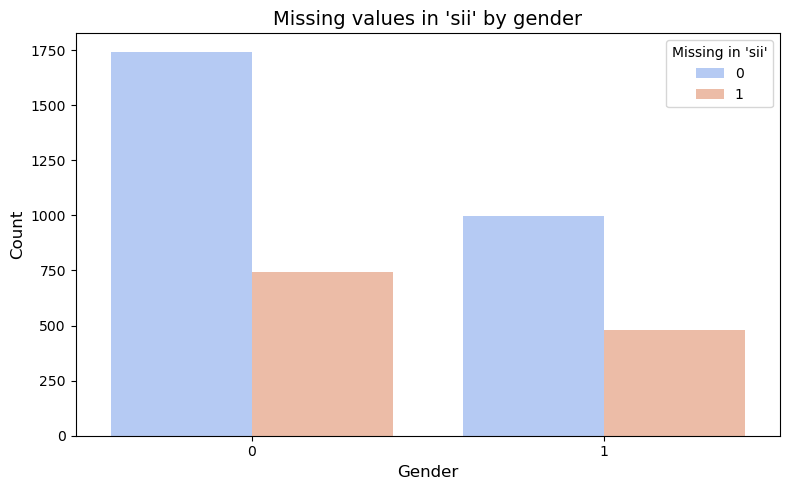

In [11]:
if 'Basic_Demos-Sex' in train_data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Basic_Demos-Sex', hue='sii_missing', data=train_data, palette="coolwarm")
    plt.title("Missing values in 'sii' by gender", fontsize=14)
    plt.xlabel("Gender", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Missing in 'sii'")
    plt.tight_layout()
    plt.show()



Visualization and analysis of the 'sii' column distribution, descriptive statistics, and correlations with a focus on strong relationships (±0.6 threshold).

Distribution of data in 'sii':
sii
0.0    1594
NaN    1224
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64


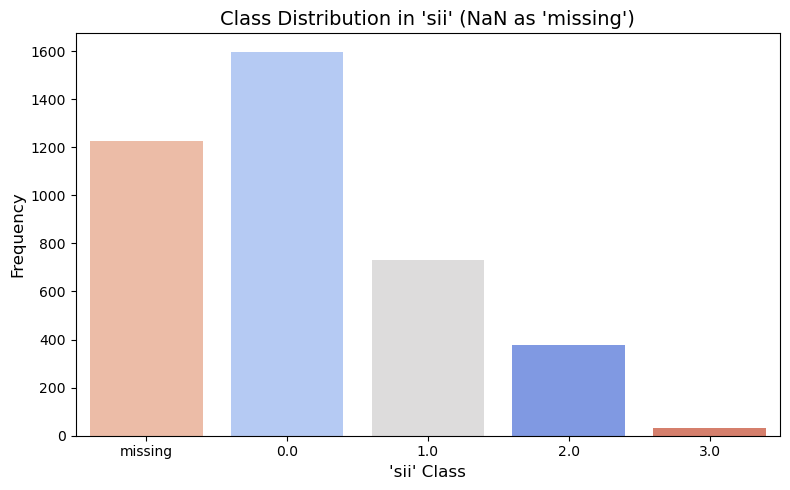


Descriptive statistics for numerical variables:
       Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
count      3960.000000      3960.000000      2421.000000   3022.000000   
mean         10.433586         0.372727        65.454771     19.331929   
std           3.574648         0.483591        22.341862      5.113934   
min           5.000000         0.000000        25.000000      0.000000   
25%           8.000000         0.000000        59.000000     15.869350   
50%          10.000000         0.000000        65.000000     17.937682   
75%          13.000000         1.000000        75.000000     21.571244   
max          22.000000         1.000000       999.000000     59.132048   

       Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count      3027.000000      3076.000000                    898.000000   
mean         55.946713        89.038615                     27.278508   
std           7.473764        44.569040                      5.56

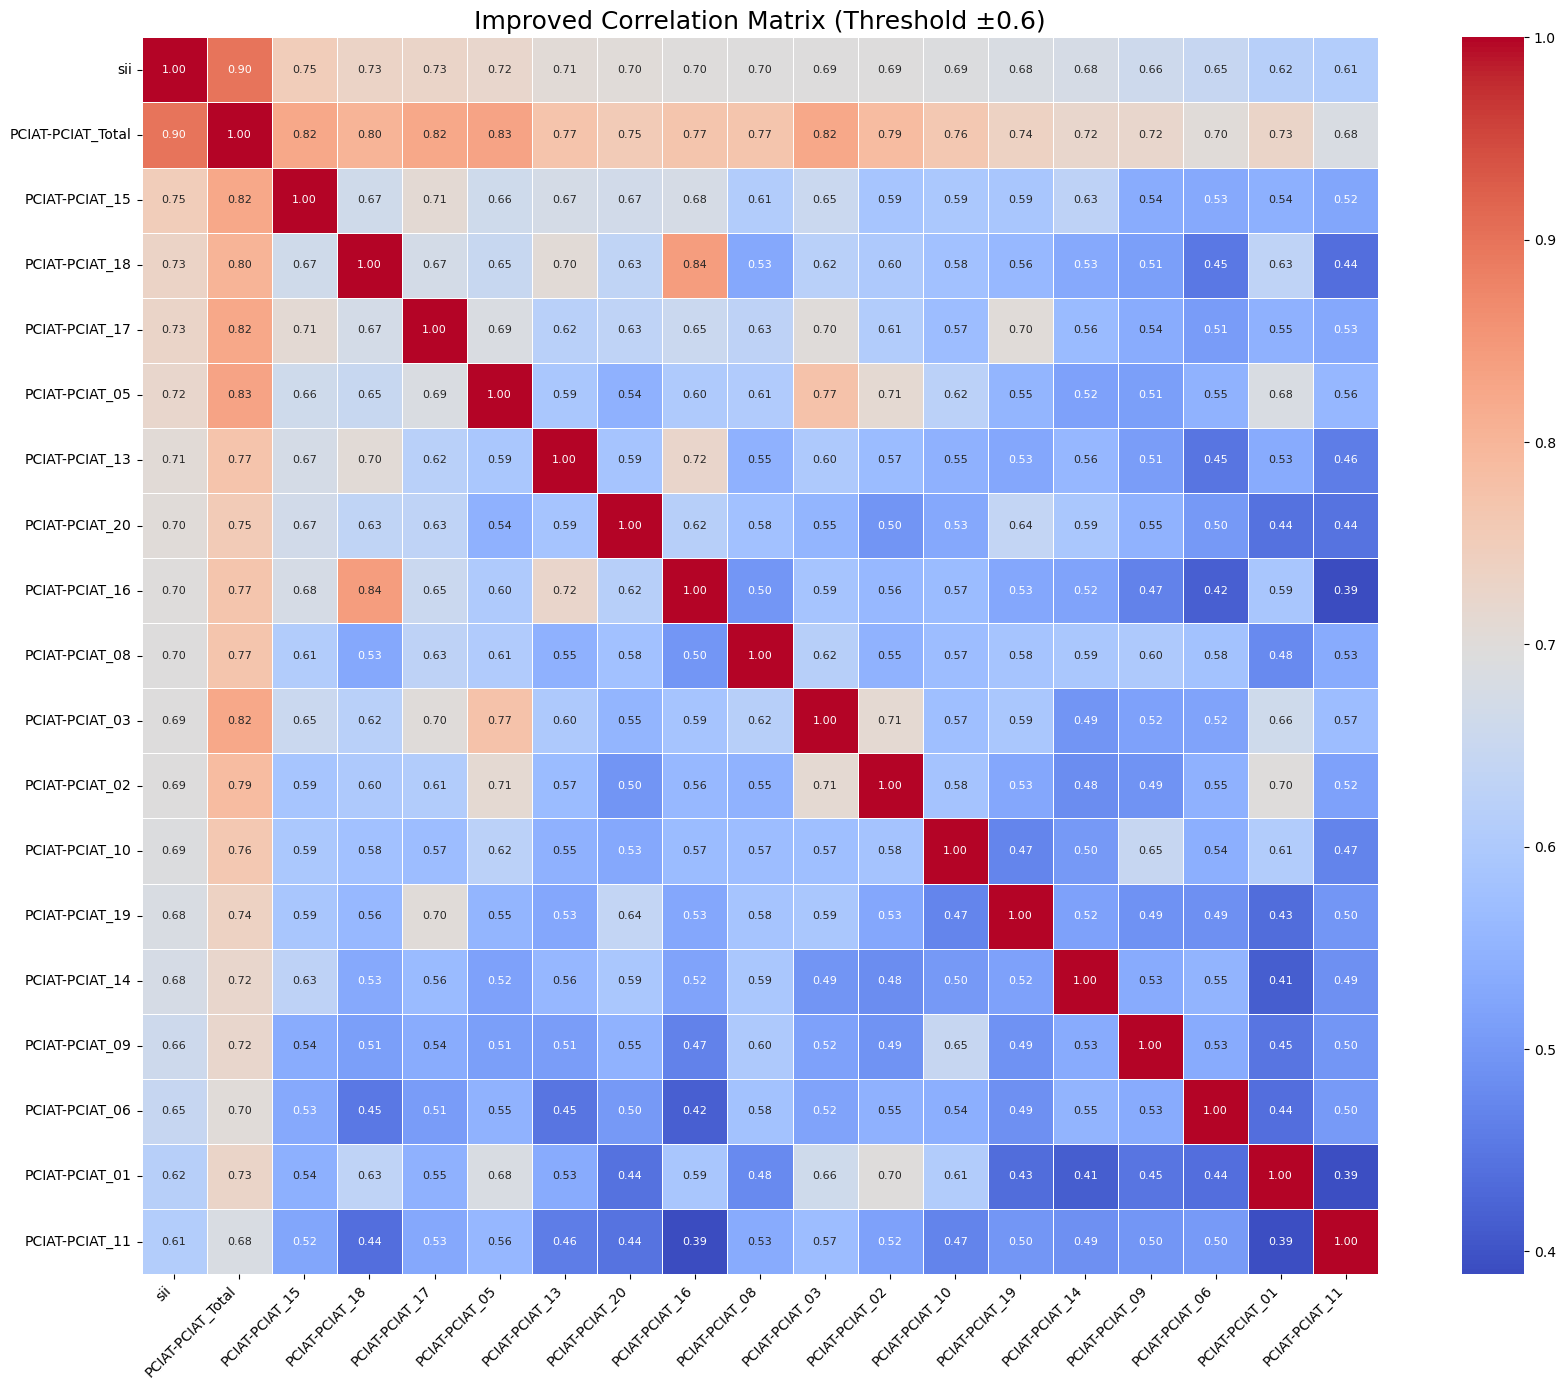

In [13]:
# Distribution of data in the 'sii' column
print("Distribution of data in 'sii':")
print(train_data['sii'].value_counts(dropna=False))  # Displaying the frequency of each value

# Creating a copy for visualization
sii_for_visualization = train_data['sii'].fillna('missing').astype(str)  # Replacing NaN with 'missing'

# Visualization of class distribution in 'sii'
plt.figure(figsize=(8, 5))
sns.countplot(
    x=sii_for_visualization, 
    order=sorted(sii_for_visualization.unique(), key=lambda x: (x != 'missing', x)),
    hue=sii_for_visualization,  # Adding hue to handle the color palette
    dodge=False,                # Disabling grouping (required with hue=x)
    palette='coolwarm',         # Color palette
    legend=False                # Disabling legend (not needed here)
)
plt.title("Class Distribution in 'sii' (NaN as 'missing')", fontsize=14)
plt.xlabel("'sii' Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Descriptive statistics for numerical variables
numeric_columns = train_data.select_dtypes(include=['number'])
print("\nDescriptive statistics for numerical variables:")
print(numeric_columns.describe())

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Filtering the correlation matrix with a ±0.6 threshold
threshold = 0.6
sorted_corr = correlation_matrix['sii'].sort_values(ascending=False)  # Sorting by 'sii'
selected_columns = sorted_corr[sorted_corr.abs() > threshold].index  # Selecting variables above the threshold

# Filtering the correlation matrix
filtered_corr_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# Visualization of the improved correlation matrix
plt.figure(figsize=(18, 14))  # Larger plot
sns.heatmap(
    filtered_corr_matrix, 
    annot=True,           # Enabling numerical annotations
    fmt=".2f",            # Formatting numbers
    cmap='coolwarm',      # Contrasting color scale
    cbar=True, 
    square=True,          # Square cells
    linewidths=0.5,       # Lines between cells
    annot_kws={"size": 8} # Scaling annotation font size
)

# Adding titles and adjusting axes
plt.title("Improved Correlation Matrix (Threshold ±0.6)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Feature engineering

In [15]:
# Creating new variables with normalization
if 'Physical-BMI' in train_data.columns:
    train_data['BMI_norm'] = train_data['Physical-BMI'] / train_data['Physical-BMI'].max()
if 'PCIAT-PCIAT_Total' in train_data.columns:
    train_data['PCIAT_Total_norm'] = train_data['PCIAT-PCIAT_Total'] / train_data['PCIAT-PCIAT_Total'].max()
if 'SDS-SDS_Total_Raw' in train_data.columns:
    train_data['SDS_Total_norm'] = train_data['SDS-SDS_Total_Raw'] / train_data['SDS-SDS_Total_Raw'].max()

# Preparing feature lists for the pipeline
numeric_features = ['BMI_norm', 'PCIAT_Total_norm', 'SDS_Total_norm']
numeric_features = [col for col in numeric_features if col in train_data.columns]
categorical_features = ['Basic_Demos-Sex']
categorical_features = [col for col in categorical_features if col in train_data.columns]

# Defining the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='drop'  # Removes unused columns
)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Setting display options
set_config(display='diagram')  # Display as diagram

# Showing the pipeline
pipeline

# Fitting the pipeline and transforming the data
pipeline.fit(train_data)
transformed_data = pipeline.transform(train_data)

# Converting the result to DataFrame
processed_columns = preprocessor.get_feature_names_out()
transformed_df = pd.DataFrame(
    transformed_data,
    columns=processed_columns,
    index=train_data.index
)

# Saving processed data to CSV file
output_path = r"C:\\Nauka\\Koło naukowe\\Child Mind Istitute\\child-mind-institute-problematic-internet-use\\transformed_train_data.csv"
transformed_df.to_csv(output_path, index=False)
print(f"Transformed data saved to: {output_path}")

Transformed data saved to: C:\\Nauka\\Koło naukowe\\Child Mind Istitute\\child-mind-institute-problematic-internet-use\\transformed_train_data.csv


Preparing data for machine learning

In [17]:
# --- 1. Loading data ---
train_path = "C:/Nauka/Koło naukowe/Child Mind Istitute/child-mind-institute-problematic-internet-use/train.csv"
test_path = "C:/Nauka/Koło naukowe/Child Mind Istitute/child-mind-institute-problematic-internet-use/test.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# List of common columns between train_data and test_data
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)
common_columns = train_columns & test_columns

# Displaying common and missing columns
print("Common columns:", common_columns)
print("Missing in train_data:", test_columns - train_columns)
print("Missing in test_data:", train_columns - test_columns)

# Automatically defining features (all common columns except 'sii' and 'id')
features = list(common_columns - {'sii', 'id'})
print(f"Selected features: {features}")

# Preparing feature processing (numerical and categorical)
numeric_features = train_data[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_data[features].select_dtypes(exclude=[np.number]).columns.tolist()

# Displaying numerical and categorical features
print(f"Numerical features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)


Common columns: {'Physical-BMI', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'Physical-HeartRate', 'FGC-FGC_CU', 'PAQ_A-PAQ_A_Total', 'FGC-FGC_SRR_Zone', 'BIA-BIA_Activity_Level_num', 'Fitness_Endurance-Season', 'BIA-BIA_ICW', 'FGC-FGC_SRR', 'BIA-BIA_TBW', 'SDS-SDS_Total_T', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_PU', 'PreInt_EduHx-computerinternet_hoursday', 'BIA-BIA_Fat', 'FGC-FGC_SRL_Zone', 'FGC-FGC_GSND_Zone', 'BIA-BIA_BMC', 'PAQ_C-Season', 'BIA-BIA_LST', 'BIA-BIA_FFMI', 'BIA-BIA_Frame_num', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Sex', 'FGC-Season', 'SDS-SDS_Total_Raw', 'BIA-BIA_BMR', 'BIA-BIA_LDM', 'Physical-Season', 'CGAS-CGAS_Score', 'FGC-FGC_SRL', 'BIA-BIA_BMI', 'BIA-BIA_DEE', 'SDS-Season', 'id', 'Physical-Systolic_BP', 'FGC-FGC_GSD', 'Fitness_Endurance-Time_Mins', 'BIA-BIA_FFM', 'CGAS-Season', 'BIA-BIA_ECW', 'Physical-Diastolic_BP', 'BIA-Season', 'PAQ_A-Season', 'Basic_Demos-Age', 'FGC-FGC_GSND', 'Fitness_Endurance-Max_Stage', 'Physical-Weight', 'FGC-FGC_CU_Zone', 'FGC-FGC_TL', 

Model 1: Training on data without missing values in 'sii'

Model 1 - Average accuracy (5-fold cross-validation): 0.5910


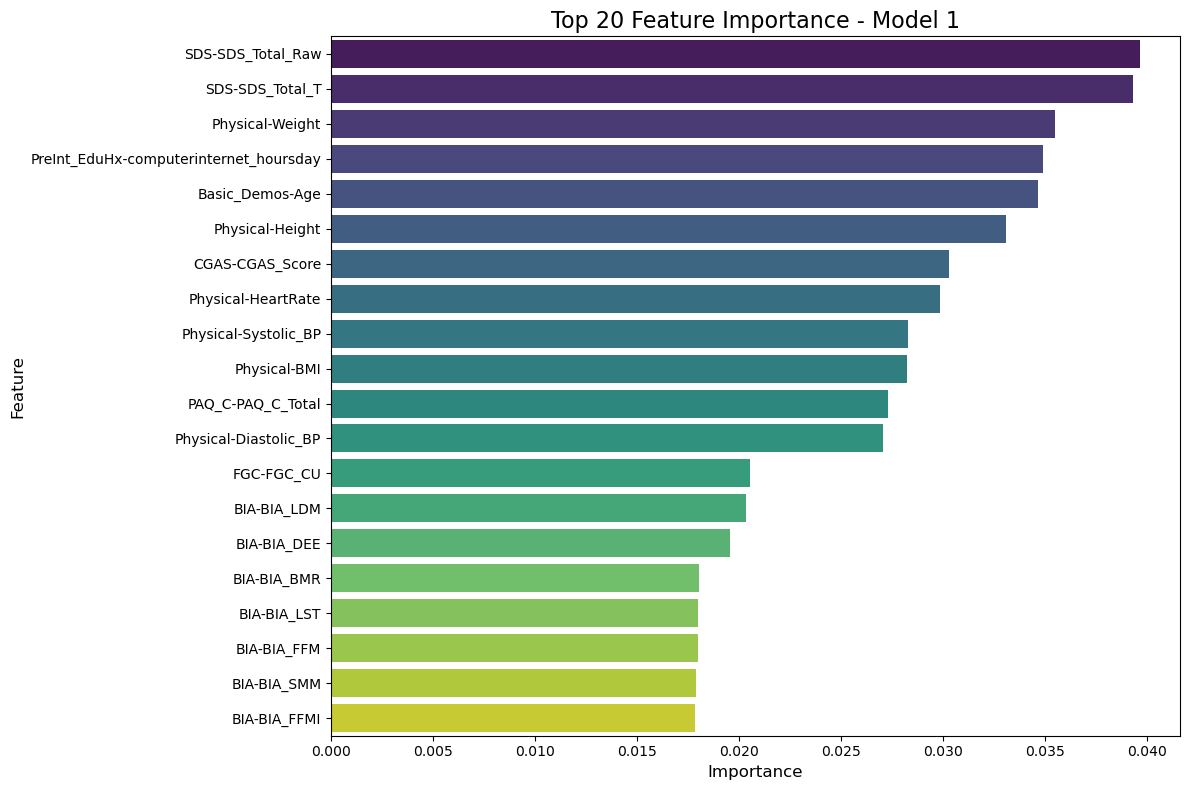

Model 1 - Predictions on the test dataset: [2. 0. 0. 1. 0. 1. 0. 0. 0. 2.]


In [19]:
# Training data without missing values in 'sii'
model1_data = train_data.dropna(subset=['sii'])
X_model1 = model1_data[features]
y_model1 = model1_data['sii']

pipeline_model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation for Model 1
scores_model1 = cross_val_score(pipeline_model1, X_model1, y_model1, cv=cv, scoring='accuracy')
print(f"Model 1 - Average accuracy (5-fold cross-validation): {scores_model1.mean():.4f}")

# Training Model 1
pipeline_model1.fit(X_model1, y_model1)

# Feature importance for Model 1
feature_importance = pipeline_model1.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(pipeline_model1.named_steps['preprocessor'].
                                        named_transformers_['cat'].get_feature_names_out())
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualization of feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis', hue='Feature', dodge=False, legend=False)
plt.title('Top 20 Feature Importance - Model 1', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Prediction on the test dataset
X_test_model1 = test_data[features]
y_pred_model1 = pipeline_model1.predict(X_test_model1)
print(f"Model 1 - Predictions on the test dataset: {y_pred_model1[:10]}")


Model 2: Adding class 4 for NaN values

In [21]:
# Adding class 4 for missing values in 'sii'
train_data['sii'] = train_data['sii'].fillna(4).astype(int)
X_model2 = train_data[features]
y_model2 = train_data['sii']

pipeline_model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Cross-validation for Model 2
scores_model2 = cross_val_score(pipeline_model2, X_model2, y_model2, cv=cv, scoring='accuracy')
print(f"Model 2 - Average accuracy (5-fold cross-validation): {scores_model2.mean():.4f}")

# Training Model 2
pipeline_model2.fit(X_model2, y_model2)

# Prediction on the test dataset
X_test_model2 = test_data[features]
y_pred_model2 = pipeline_model2.predict(X_test_model2)
print(f"Model 2 - Predictions on the test dataset: {y_pred_model2[:10]}")

Model 2 - Average accuracy (5-fold cross-validation): 0.6886
Model 2 - Predictions on the test dataset: [2 0 0 1 4 1 0 4 4 4]


Model 3: Training after filling missing values with predictions from Model 1

In [23]:
# --- 4. Model 3: Filling missing values in 'sii' with predictions from Model 1 ---
train_data.loc[train_data['sii'] == 4, 'sii'] = pipeline_model1.predict(
    train_data.loc[train_data['sii'] == 4, features]
)

X_model3 = train_data[features]
y_model3 = train_data['sii']

pipeline_model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

# Cross-validation for Model 3
scores_model3 = cross_val_score(pipeline_model3, X_model3, y_model3, cv=cv, scoring='accuracy')
print(f"Model 3 - Average accuracy (5-fold cross-validation): {scores_model3.mean():.4f}")

# Training Model 3
pipeline_model3.fit(X_model3, y_model3)

# Prediction on the test dataset
X_test_model3 = test_data[features]
y_pred_model3 = pipeline_model3.predict(X_test_model3)
print(f"Model 3 - Predictions on the test dataset: {y_pred_model3[:10]}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5979
[LightGBM] [Info] Number of data points in the train set: 3168, number of used features: 97
[LightGBM] [Info] Start training from score -0.424586
[LightGBM] [Info] Start training from score -1.608807
[LightGBM] [Info] Start training from score -1.983214
[LightGBM] [Info] Start training from score -4.802759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6032
[LightGBM] [Info] Number of data points in the train set: 3168, number of used features: 97
[LightGBM] [Info] Start training from score -0.422176
[LightGBM] [Inf

Summary of results


--- Prediction Results and Accuracy ---
Model 1 - Average accuracy: 0.5910
Model 1 - Predictions (first 10): [2. 0. 0. 1. 0. 1. 0. 0. 0. 2.]
Model 2 - Average accuracy: 0.6886
Model 2 - Predictions (first 10): [2 0 0 1 4 1 0 4 4 4]
Model 3 - Average accuracy: 0.7071
Model 3 - Predictions (first 10): [2 0 0 1 2 1 0 0 0 2]
Predictions of the best model saved to file: submission.csv


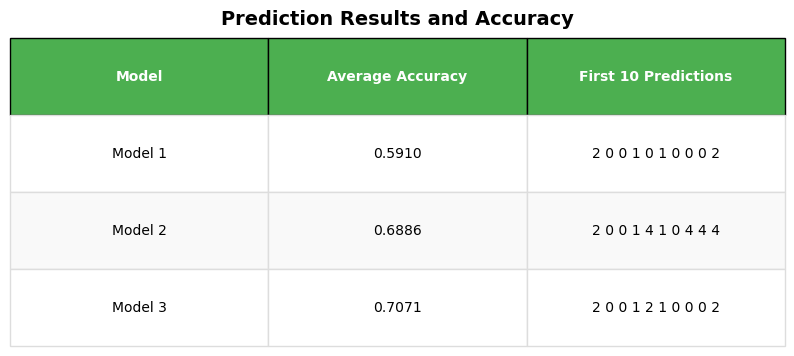

In [25]:
# Displaying prediction results and accuracy for all models
print("\n--- Prediction Results and Accuracy ---")
print(f"Model 1 - Average accuracy: {scores_model1.mean():.4f}")
print(f"Model 1 - Predictions (first 10): {y_pred_model1[:10]}")
print(f"Model 2 - Average accuracy: {scores_model2.mean():.4f}")
print(f"Model 2 - Predictions (first 10): {y_pred_model2[:10]}")
print(f"Model 3 - Average accuracy: {scores_model3.mean():.4f}")
print(f"Model 3 - Predictions (first 10): {y_pred_model3[:10]}")

# Selecting the best model for saving (example: model 3)
best_model_predictions = y_pred_model3  # Selecting predictions from the best model (e.g., model 3)

# Preparing the file for submission
output_submission_path = "submission.csv"  # File name as per requirements

# Creating a DataFrame with results
submission_df = pd.DataFrame({'id': test_data['id'], 'sii': best_model_predictions})

# Saving to a CSV file
submission_df.to_csv(output_submission_path, index=False)

print(f"Predictions of the best model saved to file: {output_submission_path}") 

# Preparing data for table visualization
results = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Average Accuracy": [f"{scores_model1.mean():.4f}", f"{scores_model2.mean():.4f}", f"{scores_model3.mean():.4f}"],
    "First 10 Predictions": [
        " ".join(map(str, map(int, y_pred_model1[:10]))),
        " ".join(map(str, map(int, y_pred_model2[:10]))),
        " ".join(map(str, map(int, y_pred_model3[:10])))
    ]
}

results_df = pd.DataFrame(results)

# Enhanced table visualization
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.axis('tight')

# Create table with a better style
table = ax.table(
    cellText=results_df.values,
    colLabels=results_df.columns,
    loc='center',
    cellLoc='center',
    bbox=[0, 0, 1, 1],
)

# Customize the table
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4CAF50')
    else:  # Data rows
        cell.set_facecolor('#f9f9f9' if row % 2 == 0 else '#ffffff')
        cell.set_edgecolor('#dddddd')

plt.title("Prediction Results and Accuracy", fontsize=14, weight='bold', pad=10)
plt.show()
